### Importing Modules

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Loading DataSet

In [2]:
iris = datasets.load_iris()

### Showing DataSet

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Showing Dataset in a Dataframe for better understanding

In [4]:
df= pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Assigning target and feature variables

In [6]:
x = iris.data
y = iris.target

# Applying K-mean 

In [9]:
model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x)

all_predictions = model.predict(x)
centroids = model.cluster_centers_
centroids

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc9aad15cf0>
Traceback (most recent call last):
  File "/home/muhammadtalha/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/muhammadtalha/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/muhammadtalha/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/muhammadtalha/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_w

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

# Showing Plotting

<function matplotlib.pyplot.show(close=None, block=None)>

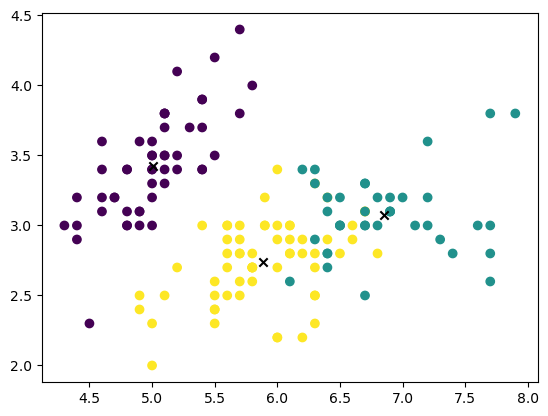

In [11]:
plt.scatter(x[:,0], x[:,1], c=all_predictions)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="black")
plt.show

In [13]:
iris = datasets.load_iris()
x.shape

(150, 4)

# Applying PCA

In [17]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x)

x_reduced.shape


(150, 2)

# Again Applying K-Mean

In [24]:
model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x_reduced)
all_predictions = model.predict(x_reduced)
centroids = model.cluster_centers_
centroids

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc9ab014310>
Traceback (most recent call last):
  File "/home/muhammadtalha/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/muhammadtalha/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/muhammadtalha/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/muhammadtalha/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_w

array([[-2.64241546,  0.19088505],
       [ 0.66567601, -0.3316042 ],
       [ 2.34652659,  0.27393856]])

# Showing plotting to see the difference

<function matplotlib.pyplot.show(close=None, block=None)>

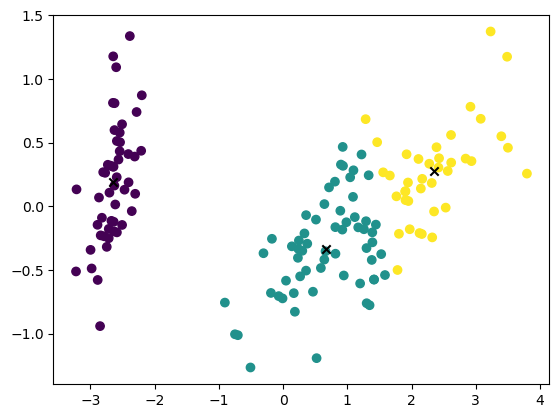

In [27]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=all_predictions)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="black")
plt.show